<a href="https://colab.research.google.com/github/ali-workshop/Predicting-Student-Performance_diffent_ML_models_advanced_exploring_data_analysis/blob/main/Predicting_Student_Performance_advanced_exploring_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download the necessary libraries

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


#impor libraries

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
# for plot the data
import plotly.graph_objects as go
import plotly.express as pex
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

#read  data using pandas

In [ ]:
#df stands for DataFrame which is how we present data
df = pd.read_csv('/content/drive/MyDrive/stud (2).csv')

In [ ]:
#print the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Start exploring, pre-processing and visualizing data

*  Print categories in each column in the data

In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


* Check for null values

In [ ]:
print('There are a total {} missing values in the dataset.'.format(df.isnull().any().sum()))

There are a total 0 missing values in the dataset.


* Check for duplicates

In [ ]:
print('There are {} duplicated rows in the dataset.'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates is {}.'.format(df.shape[0]))

There are 0 duplicated rows in the dataset.
Number of rows after dropping duplicates is 1000.


* Features distrubution

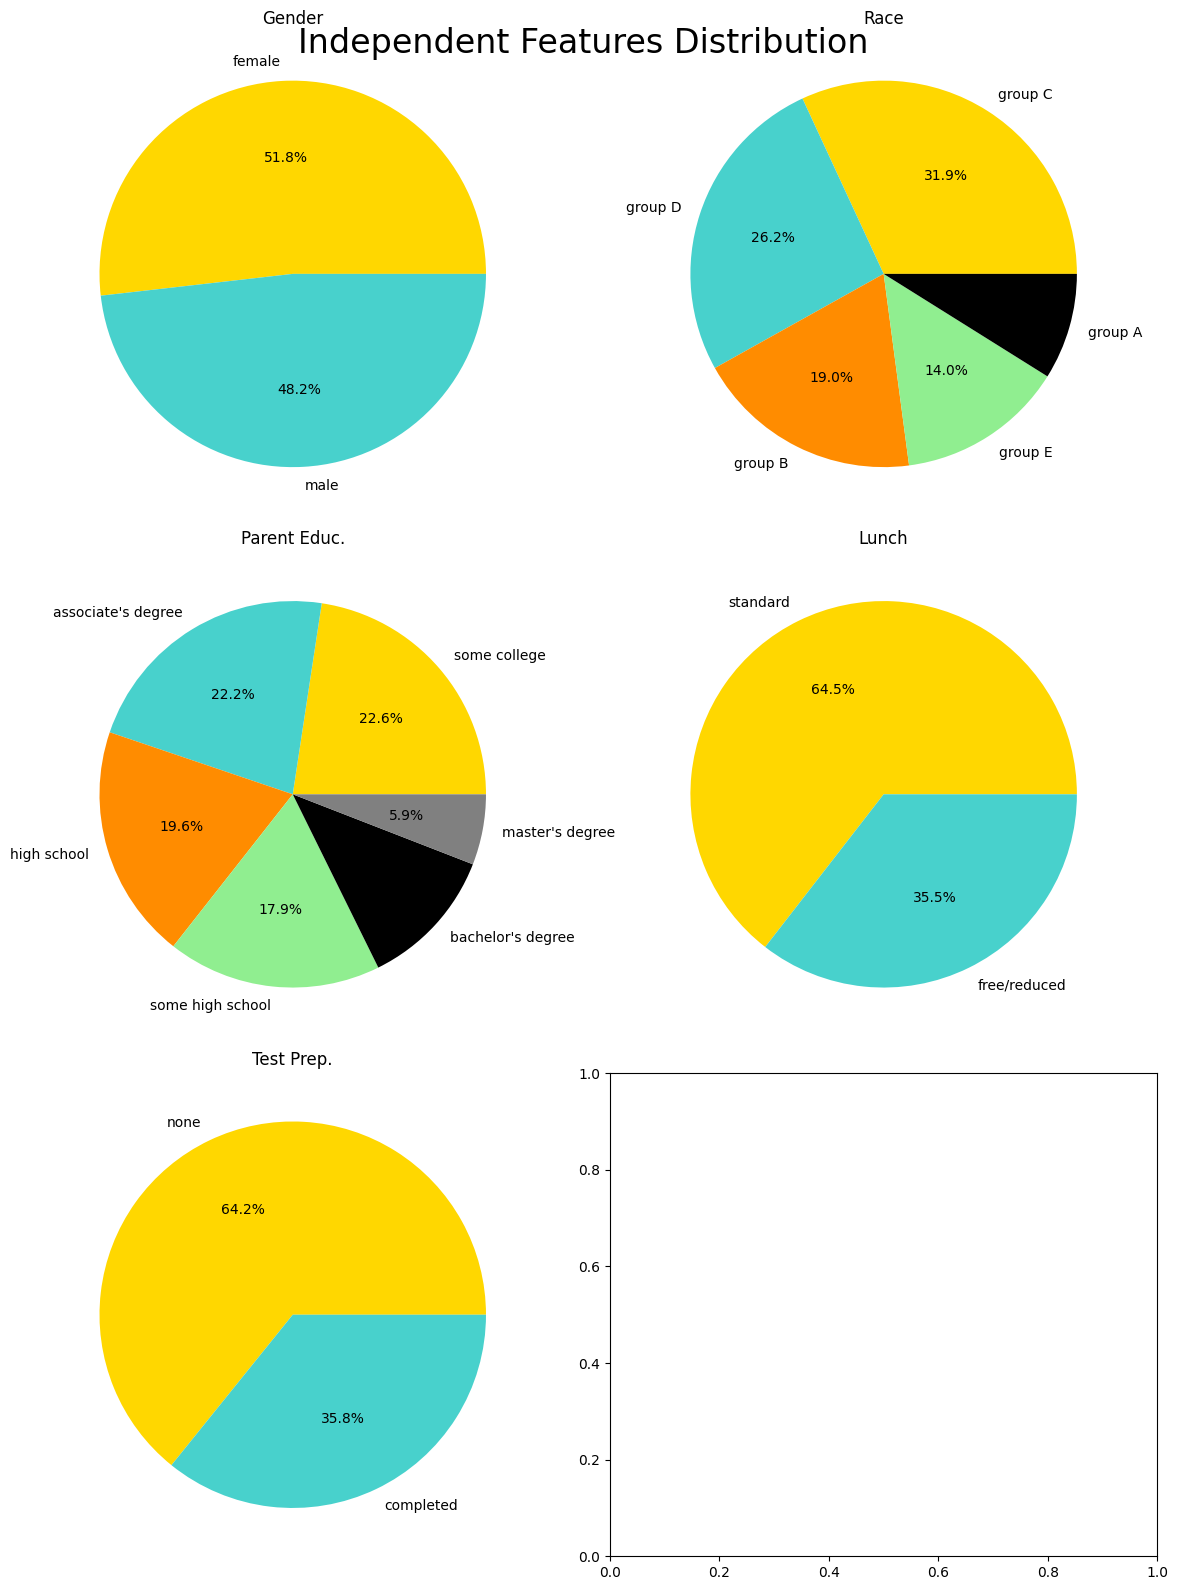

In [ ]:

# Define your colors
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'black', 'Gray']

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

# Extract data for each pie chart
gender_data = df['gender'].value_counts()
race_data = df['race_ethnicity'].value_counts()
education_data = df['parental_level_of_education'].value_counts()
lunch_data = df['lunch'].value_counts()
test_prep_data = df['test_preparation_course'].value_counts()

# Create pie charts and add them to the subplots
axs[0, 0].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', colors=colors)
axs[0, 0].set_title('Gender')

axs[0, 1].pie(race_data, labels=race_data.index, autopct='%1.1f%%', colors=colors)
axs[0, 1].set_title('Race')

axs[1, 0].pie(education_data, labels=education_data.index, autopct='%1.1f%%', colors=colors)
axs[1, 0].set_title('Parent Educ.')

axs[1, 1].pie(lunch_data, labels=lunch_data.index, autopct='%1.1f%%', colors=colors)
axs[1, 1].set_title('Lunch')

axs[2, 0].pie(test_prep_data, labels=test_prep_data.index, autopct='%1.1f%%', colors=colors)
axs[2, 0].set_title('Test Prep.')

# Adjust spacing between subplots
plt.tight_layout()

# Set the title for the entire figure
fig.suptitle("Independent Features Distribution", fontsize=24)

# Display the plot
plt.show()


* Test scores distribution

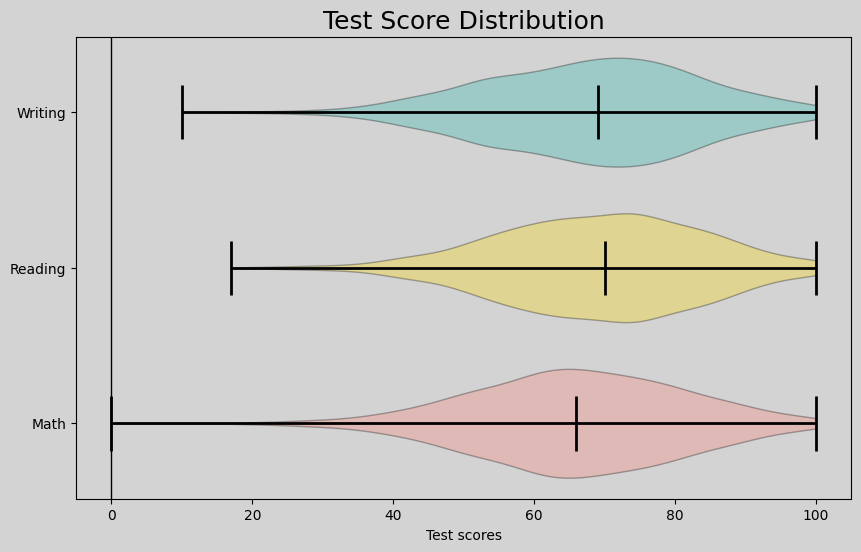

In [ ]:
# Extract data
data_m = df['math_score']
data_r = df['reading_score']
data_w = df['writing_score']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create violin plots for each dataset
violins = ax.violinplot([data_m, data_r, data_w], showmedians=True, vert=False, widths=0.7)

# Customize violin plot colors
colors = ['salmon', 'gold', 'lightseagreen']
for partname in violins.keys():
    if partname == 'bodies':
        for pc, color in zip(violins[partname], colors):
            pc.set_facecolor(color)
            pc.set_edgecolor('black')
    else:
        violins[partname].set_color('black')
        violins[partname].set_linewidth(2)

# Set labels for the violin plots
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Math', 'Reading', 'Writing'])

# Set the title and axis labels
ax.set_title('Test Score Distribution', fontsize=18)
ax.set_xlabel('Test scores')

# Remove x-axis gridlines and zero line
ax.xaxis.grid(False)
ax.axvline(0, color='black', linewidth=1)

# Customize background color
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Display the plot
plt.show()


* subject scores

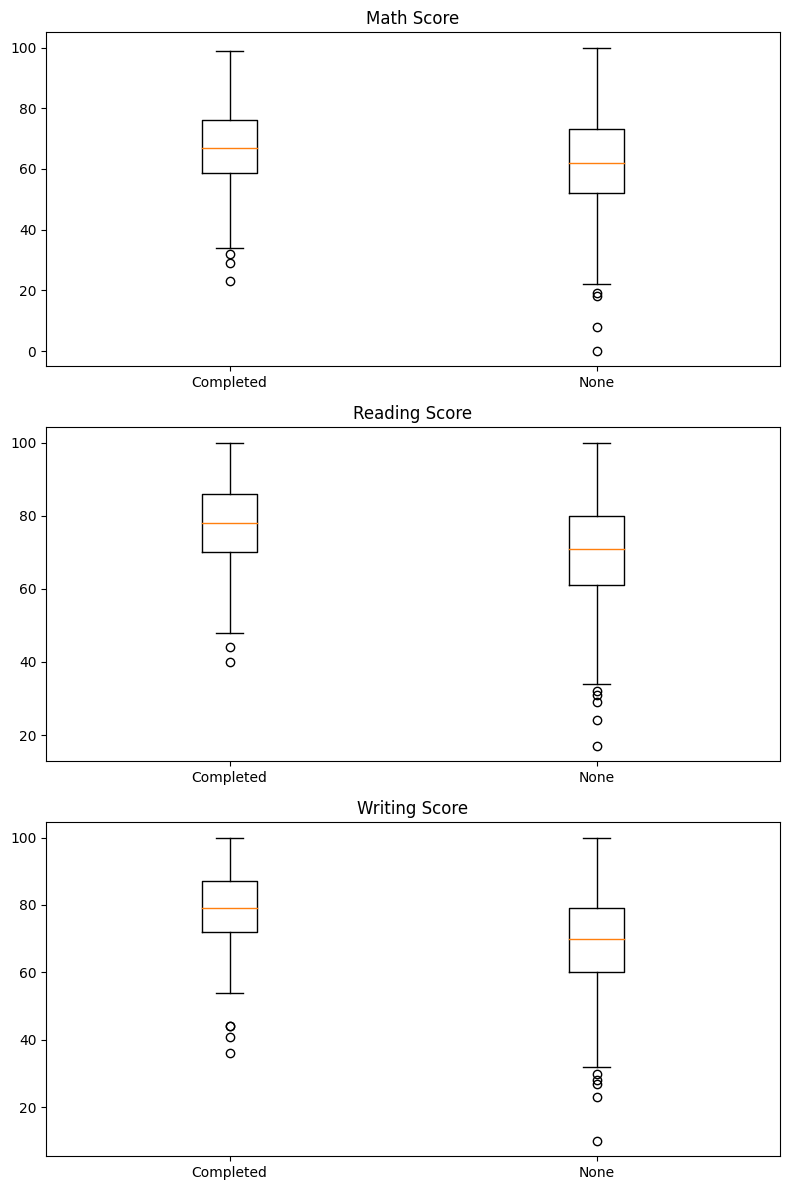

In [ ]:
import matplotlib.pyplot as plt

# Extract data for math, reading, and writing scores
math_data = df[df['gender'] == 'female']['math_score']
reading_data = df[df['gender'] == 'female']['reading_score']
writing_data = df[df['gender'] == 'female']['writing_score']
test_prep_course = df[df['gender'] == 'female']['test_preparation_course']

# Create a figure with subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Create box plots for math score
axs[0].boxplot([math_data[test_prep_course == 'completed'], math_data[test_prep_course == 'none']], labels=['Completed', 'None'])
axs[0].set_title("Math Score")

# Create box plots for reading score
axs[1].boxplot([reading_data[test_prep_course == 'completed'], reading_data[test_prep_course == 'none']], labels=['Completed', 'None'])
axs[1].set_title("Reading Score")

# Create box plots for writing score
axs[2].boxplot([writing_data[test_prep_course == 'completed'], writing_data[test_prep_course == 'none']], labels=['Completed', 'None'])
axs[2].set_title("Writing Score")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


* density contour plots

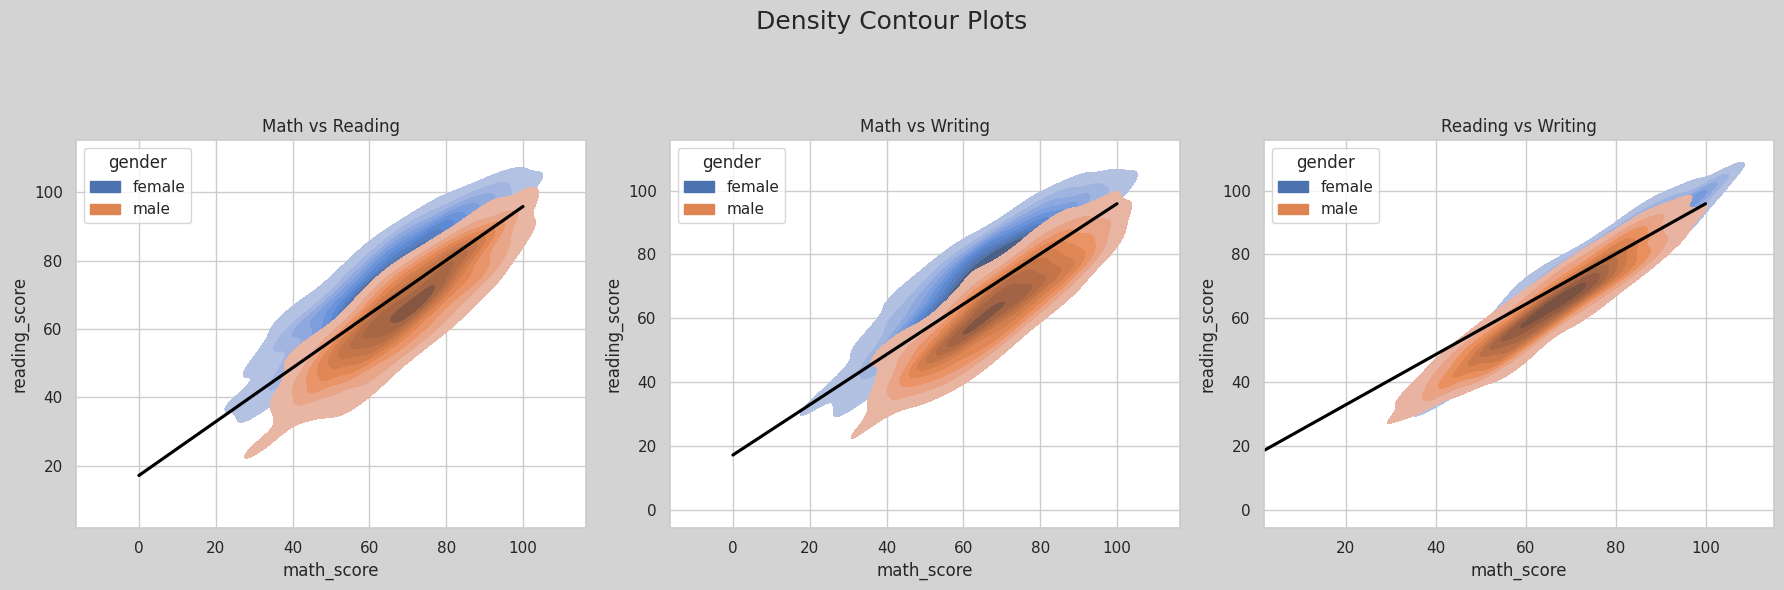

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a 1x3 grid of subplots (remove the fourth subplot)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define color map for gender
color_map = {"male": "RebeccaPurple", "female": "lightsalmon"}

# Plot Math vs Reading with marginal histograms
sns.kdeplot(data=df, x="math_score", y="reading_score", hue="gender", shade=True, ax=axs[0], cmap=color_map)
axs[0].set_title("Math vs Reading")
axs[0].set_xlabel("Math Score")
axs[0].set_ylabel("Reading Score")

# Plot Math vs Writing with marginal histograms
sns.kdeplot(data=df, x="math_score", y="writing_score", hue="gender", shade=True, ax=axs[1], cmap=color_map)
axs[1].set_title("Math vs Writing")
axs[1].set_xlabel("Math Score")
axs[1].set_ylabel("Writing Score")

# Plot Reading vs Writing with marginal histograms
sns.kdeplot(data=df, x="reading_score", y="writing_score", hue="gender", shade=True, ax=axs[2], cmap=color_map)
axs[2].set_title("Reading vs Writing")
axs[2].set_xlabel("Reading Score")
axs[2].set_ylabel("Writing Score")

# Remove x-axis and y-axis labels for marginal histograms
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[2].set_ylabel("")

# Add trendlines using regression lines
for ax in axs.flat:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    sns.regplot(data=df, x="math_score", y="reading_score", ax=ax, scatter=False, color="gray", line_kws={"color": "black"}, ci=None)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Customize background color
fig.patch.set_facecolor('lightgray')

# Set the title for the entire figure
fig.suptitle("Density Contour Plots", fontsize=18)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Display the plot
plt.show()

###Additional Feature

####We will add average score as an additional feature (average_score).

In [ ]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


#print the correlation matrix

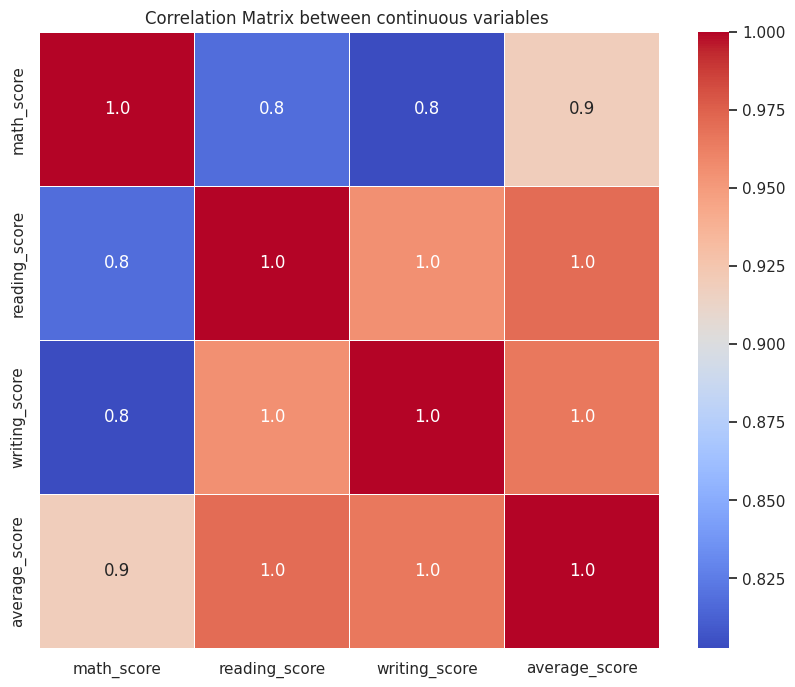

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Correlation Matrix between continuous variables ")
plt.show()

In [ ]:
print(df.corr())

               math_score  reading_score  writing_score  average_score
math_score       1.000000       0.817580       0.802642       0.918746
reading_score    0.817580       1.000000       0.954598       0.970331
writing_score    0.802642       0.954598       1.000000       0.965667
average_score    0.918746       0.970331       0.965667       1.000000


#We will build two prediction models.
* The first model will predict the student's grade in mathematics
* The last model is an Early Warning System (EWS) in order to alert the student that he is in a danger phase and may fail the exam.

#start with first model

In [ ]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

#some preprocessing on the X features(input-features)

#trasform and scale data berfore fitting the ML algorithms for better results

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Assuming X is your original DataFrame
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

X_transformed = preprocessor.fit_transform(X)

# Get feature names after transformation
feature_names = preprocessor.named_transformers_["OneHotEncoder"].get_feature_names_out(cat_features).tolist()
feature_names += num_features.tolist()

# Create a DataFrame with the transformed data and feature names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)


# separate dataset into train and test


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

# Visualize data after preprocessing

In [ ]:
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.056946,0.457333,0.086268
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.947790,0.984063,0.671055
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.358949,1.181586,1.185668
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.148634,-0.135238,-0.217822
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.354214,-0.727809,-0.217822
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-3.095274,-3.493139,-3.141758
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.112741,2.103363,2.168111
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.536631,0.786539,0.250008
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.354214,-0.135238,-0.124256
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.765373,-1.057015,-1.059915


#plot the Correlation matrix after preprocessing

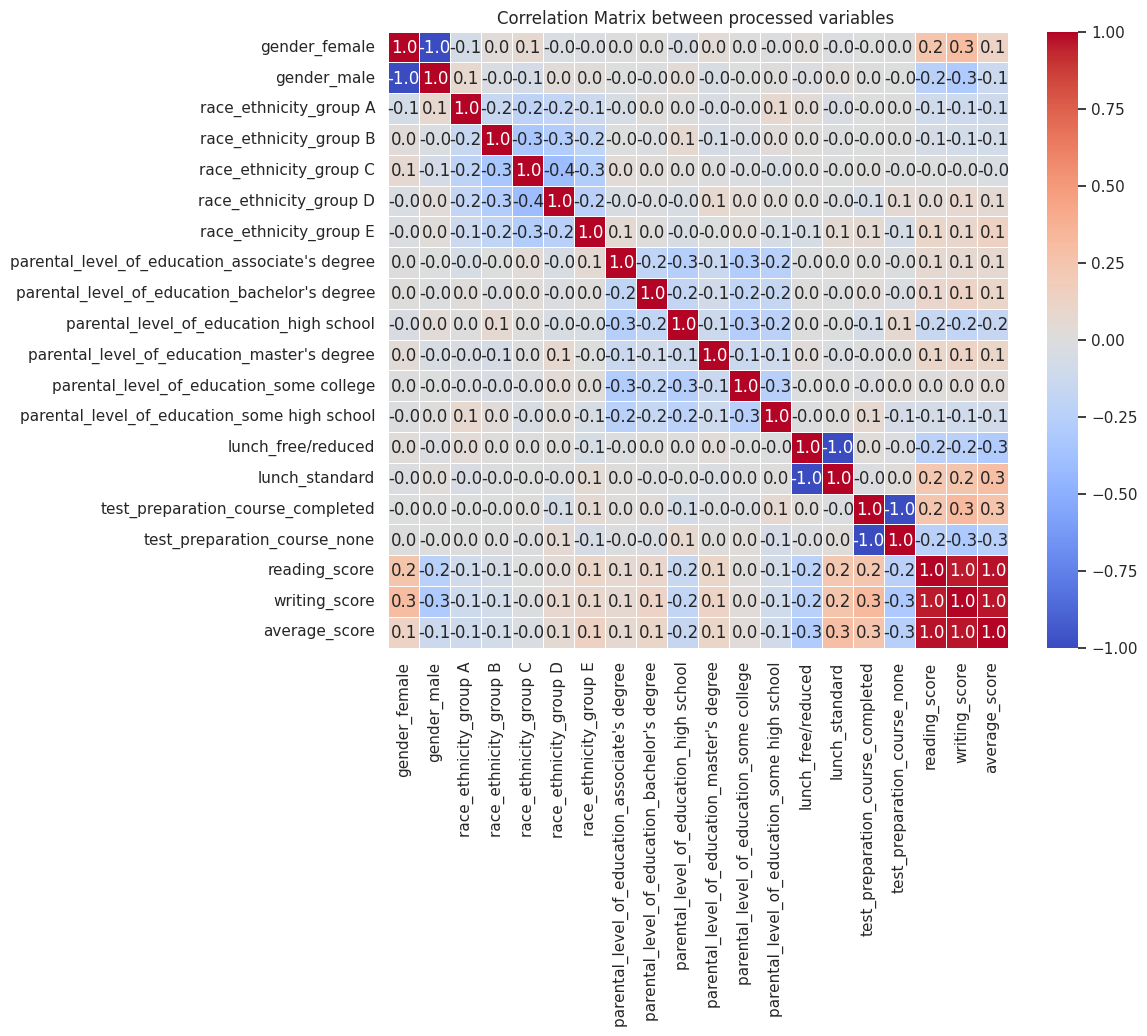

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_transformed_df.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Correlation Matrix between processed variables ")
plt.show()

#define fucntion to evaluate the model

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

##Select multiple machine learning models to compare performance and choose the best one

In [ ]:
# Lasso stands for "Least Absolute Shrinkage and Selection Operator."
#Lasso is useful when you suspect that some of the input features are irrelevant or redundant.
# Ridge is useful when multicollinearity (high correlation between features) is a concern.

models = {
    "Lasso": Lasso(random_state=1),
    "Ridge": Ridge(random_state=1),
    "Random Forest Regressor": RandomForestRegressor(random_state=1),
    "XGBRegressor": XGBRegressor(random_state=1),
    "CatBoosting Regressor": CatBoostRegressor(random_state=1,verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=1),
    "KNeighborsRegressor":KNeighborsRegressor(n_neighbors=5)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Lasso
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5171
- Mean Absolute Error: 0.4147
- R2 Score: 0.9988
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5229
- Mean Absolute Error: 0.4086
- R2 Score: 0.9989


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.1054
- Mean Absolute Error: 0.8491
- R2 Score: 0.9946
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0108
- Mean Absolute Error: 2.1615
- R2 Score: 0.9627


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1121
- Mean Absolute Error: 0.0829
- R2 Score: 0.9999
--------------------------

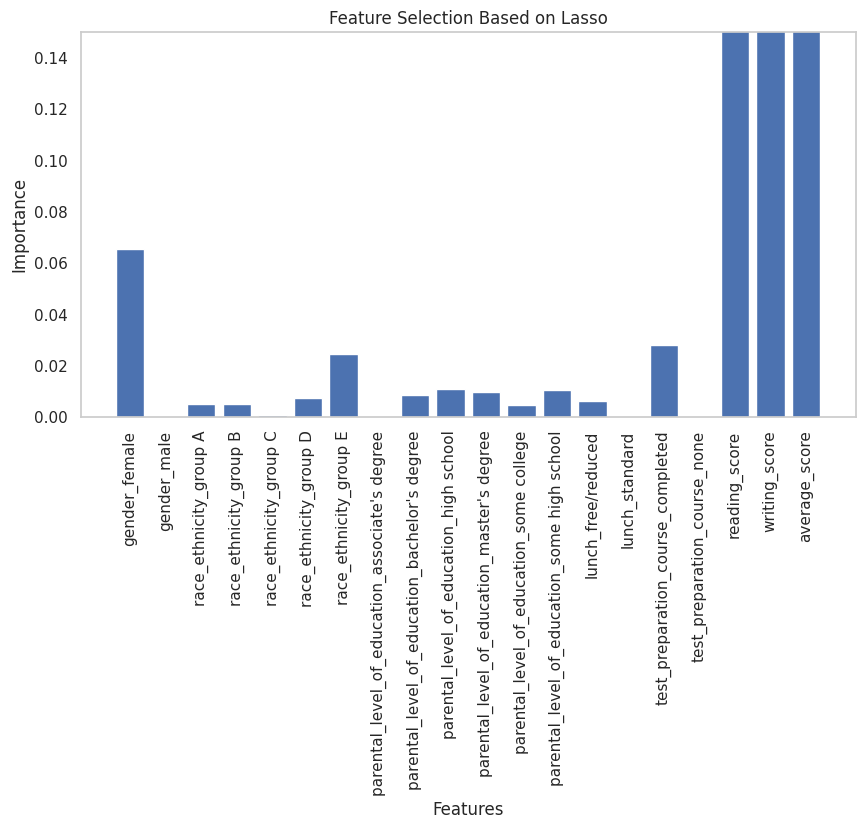

In [ ]:
# Lasso for feature selection
lasso_model = Lasso(alpha=0.00001)
lasso_model.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso_coef = np.abs(lasso_model.coef_)

# Plotting the importance of columns.
plt.figure(figsize=(10, 5))
names=X_transformed_df.columns
plt.bar(names, lasso_coef)
plt.xticks( rotation=90)
plt.grid()
plt.title(f"Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

#fit another model which is KNN regressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train) # Train model
# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))


Model performance for Training set
- Root Mean Squared Error: 4.6455
- Mean Absolute Error: 3.7098
- R2 Score: 0.9043
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9095
- Mean Absolute Error: 4.6980
- R2 Score: 0.8565


#save the weights for the KNN regressor

In [ ]:
import joblib
joblib.dump(knn, 'knnscoreregression.pkl')

['knnscoreregression.pkl']

#reload the model for re-use it later

In [ ]:
loaded_knn = joblib.load('/content/knnscoreregression.pkl' , mmap_mode ='r')

#print the results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
1,Ridge,0.998877
3,XGBRegressor,0.977101
4,CatBoosting Regressor,0.965389
2,Random Forest Regressor,0.962748
5,AdaBoost Regressor,0.924794
0,Lasso,0.908560
6,KNeighborsRegressor,0.856486


#start with the second model which is EWS


# We will add a feature (at_risk) to use it as target with our model and build an effective risk warning system

In [ ]:
# Determine the Threshold for "At Risk"
threshold = 65
# Create the Target Feature
df['at_risk'] = (df['average_score'] < threshold).astype(int)


##re-define features (X) and target (y) and make processing

In [ ]:
X = df.drop(['at_risk'], axis=1)  # Features (excluding the target)
y = df['at_risk']                # Target variable (at_risk)

# Create Column Transformer with 2 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)


# Split the data into training and testing sets




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Visualize data after preprocessing

In [ ]:
X_train.shape

(800, 21)

In [ ]:
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.851902,0.810737,0.193968,0.647664
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.203820,-0.422740,-0.398603,-0.358171
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.851902,1.084843,1.181586,1.092102
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.005872,0.125472,0.523174,0.226617
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.643694,1.153370,1.049904,1.349408
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.060110,0.742211,0.852380,0.577489
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.797664,-0.765373,-0.464444,-0.709043
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.192076,-0.765373,-0.991174,-0.545302
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.533734,-0.559793,-1.057015,-0.755826
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.521989,0.331052,0.259809,0.390357



# Initialize several machine learning models for comparsion

In [ ]:
logistic_regression = LogisticRegression(random_state=1)
random_forest = RandomForestClassifier(random_state=1)
svc = SVC(random_state=1)
# Train the models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Evaluate the models (e.g., using accuracy)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print model accuracies
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Support Vector Classifier Accuracy: {accuracy_svc:.2f}')


Logistic Regression Accuracy: 0.97
Random Forest Accuracy: 0.99
Support Vector Classifier Accuracy: 0.98


# Calculate precision, recall, and F1 score for each model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_score_svc = f1_score(y_test, y_pred_svc)
print("*****************************")
print('Logistic Regression:')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')
print(f'F1 Score: {f1_score_lr:.2f}')
print("*****************************")
print('Random Forest:')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_score_rf:.2f}')
print("*****************************")
print('Support Vector Classifier:')
print(f'Precision: {precision_svc:.2f}')
print(f'Recall: {recall_svc:.2f}')
print(f'F1 Score: {f1_score_svc:.2f}')


*****************************
Logistic Regression:
Precision: 0.94
Recall: 1.00
F1 Score: 0.97
*****************************
Random Forest:
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
*****************************
Support Vector Classifier:
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
